In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import functools
import numpy as np
import matplotlib.gridspec as gridspec
#plt.rcParams['figure.figsize'] = [6,6]

In [2]:
def cartesian_product(arrays):
    broadcastable = np.ix_(*arrays)
    broadcasted = np.broadcast_arrays(*broadcastable)
    rows, cols = functools.reduce(np.multiply, broadcasted[0].shape), len(broadcasted)
    out = np.empty(rows * cols, dtype=broadcasted[0].dtype)
    start, end = 0, rows
    for a in broadcasted:
        out[start:end] = a.reshape(-1)
        start, end = end, end + rows
    return out.reshape(cols, rows).T

In [3]:
def is_in_ellipse(L, W, lam, pt):
    x,y = pt
    return int((x*np.pi/L)**2 + (y*np.pi/W)**2 < lam)

def count(L, W, lam, dirichlet):
    """Compute the eigenvalue counting function of a rectangle"""
    # if dirichlet, start all counting ranges at 1. otherwise, start at 0.
    start = int(dirichlet)
    max_x = np.floor(L*np.sqrt(lam)/np.pi)
    max_y = np.floor(W*np.sqrt(lam)/np.pi)
    x = np.arange(start, max_x+1, 1)
    y = np.arange(start, max_y+1, 1)
    grid = cartesian_product([x,y])
    def test(pt):
        return is_in_ellipse(L, W, lam, pt)
    if not list(grid):
        return 0
    else:
        return np.sum(np.apply_along_axis(test, 1, grid))

count(5, 3, 10, True)

7

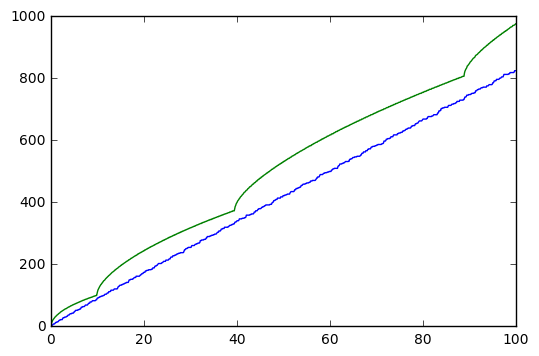

In [4]:
lams = np.arange(0, 100, 0.1)
dirichlet = False
area = 100
weyl_function = (area/(4*np.pi))*lams
square_eigs = np.array([count(np.sqrt(area), np.sqrt(area), lam, dirichlet) for lam in lams])
square_weyl_function = (area/(4*np.pi))*lams + (-1)**int(dirichlet)*(4*np.sqrt(area)/np.sqrt(32*np.pi))*np.sqrt(lams)

factor = 10
L = np.sqrt(area)/factor
W = np.sqrt(area)*factor

rect_eigs = np.array([count(L, W, lam, dirichlet) for lam in lams])
rect_weyl_function = (area/(4*np.pi))*lams + (-1)**int(dirichlet)*(2*(L+W)/np.sqrt(32*np.pi))*np.sqrt(lams)

#plt.plot(lams, weyl_function)
plt.plot(lams, square_eigs)
plt.plot(lams, rect_eigs)
plt.show()

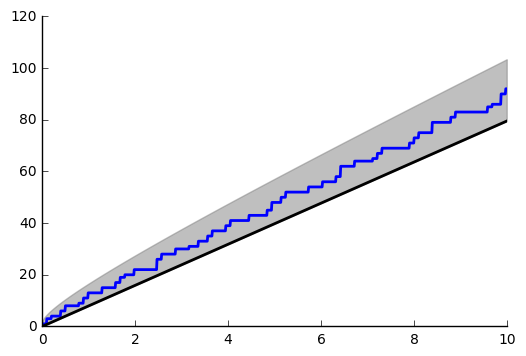

In [5]:
x = np.arange(0.01, 10, 0.01)
y_err = (1. + np.pi*np.sqrt(0.1**2 + 0.1**2)/np.sqrt(x))**2
fig, ax = plt.subplots(1, 1)
square_eigs = np.array([count(10, 10, lam, dirichlet) for lam in x])
ax.plot(x, square_eigs, linewidth=2)
weyl_func = area*x/(4*np.pi)
ax.plot(x, weyl_func, color='k', linewidth=2)
ax.fill_between(x, weyl_func , weyl_func*y_err , color='gray', alpha=0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()
fig.savefig('/home/neal/Dropbox/Documents/Dissertation/figures/weyl_square.pdf', extension='pdf')
plt.show()

In [6]:
weyl_func = area*x/(4*np.pi)

sq_eigvals = sorted([(m*np.pi)**2 + (n*np.pi)**2 for m in range(1,1000) for n in range(1,1000)])
re_eigvals = sorted([(m*np.pi/2.)**2 + (n*np.pi/3.)**2 for m in range(1,1000) for n in range(1,1000)])

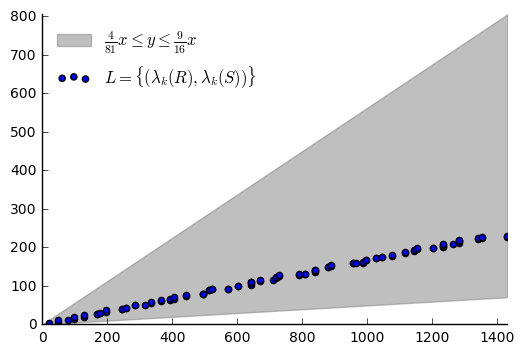

In [7]:
N=100
upper_val = sq_eigvals[N]
x = np.arange(0, upper_val, 0.1)
lower_bd = (4./81.)*x
upper_bd = (9./16.)*x

fig, ax = plt.subplots(1,1)
ax.fill_between(x, lower_bd, upper_bd, color='gray', alpha=0.5, label=r'$\frac{4}{81}x\leq y\leq\frac{9}{16}x$')
ax.scatter(sq_eigvals[:N], re_eigvals[:N], label=r'$L = \{(\lambda_k(R),\lambda_k(S))\}$')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()
ax.set_xlim((0, upper_val))
ax.set_ylim((0, 9.*upper_val/16.))
ax.legend(frameon=False, loc='upper left')
fig.savefig("/home/neal/Dropbox/Documents/Dissertation/rectangle_compare.pdf", extension="pdf")
plt.show()

In [8]:
x1 = np.arange(0, 100, 0.1)
x2 = np.arange(0, 10., 0.01)
weyl_func_1 = 100.*x1/(4*np.pi)
weyl_func_2 = 100.*x2/(4*np.pi)
sq_dir_1 = [count(10., 10., lam, True) for lam in x1]
sq_dir_2 = [count(10., 10., lam, True) for lam in x2]
sq_neu_1 = [count(10., 10., lam, False) for lam in x1]
sq_neu_2 = [count(10., 10., lam, False) for lam in x2]

In [9]:
r1_dir_1 = [count(25., 4., lam, True) for lam in x1]
r1_dir_2 = [count(25., 4., lam, True) for lam in x2]
r1_neu_1 = [count(25., 4., lam, False) for lam in x1]
r1_neu_2 = [count(25., 4., lam, False) for lam in x2]

In [10]:
r2_dir_1 = [count(100., 1., lam, True) for lam in x1]
r2_dir_2 = [count(100., 1., lam, True) for lam in x2]
r2_neu_1 = [count(100., 1., lam, False) for lam in x1]
r2_neu_2 = [count(100., 1., lam, False) for lam in x2]

In [52]:
x_axes = [x1, x2]
weyl_funcs = [weyl_func_1, weyl_func_2]
to_graph = [
              [[sq_dir_1, r1_dir_1], [sq_dir_2, r1_dir_2], [sq_neu_1, r1_neu_1], [sq_neu_2, r1_neu_2]],
              [[sq_dir_1, r2_dir_1], [sq_dir_2, r2_dir_2], [sq_neu_1, r2_neu_1], [sq_neu_2, r2_neu_2]]
            ]
rectangle_names = [r'$25\times 4$', r'$100\times 1$']
titles = ['Dirichlet; [0, 10]', 'Dirichlet; [0, 100]', 'Neumann; [0, 10]', 'Neumann; [0, 100]']

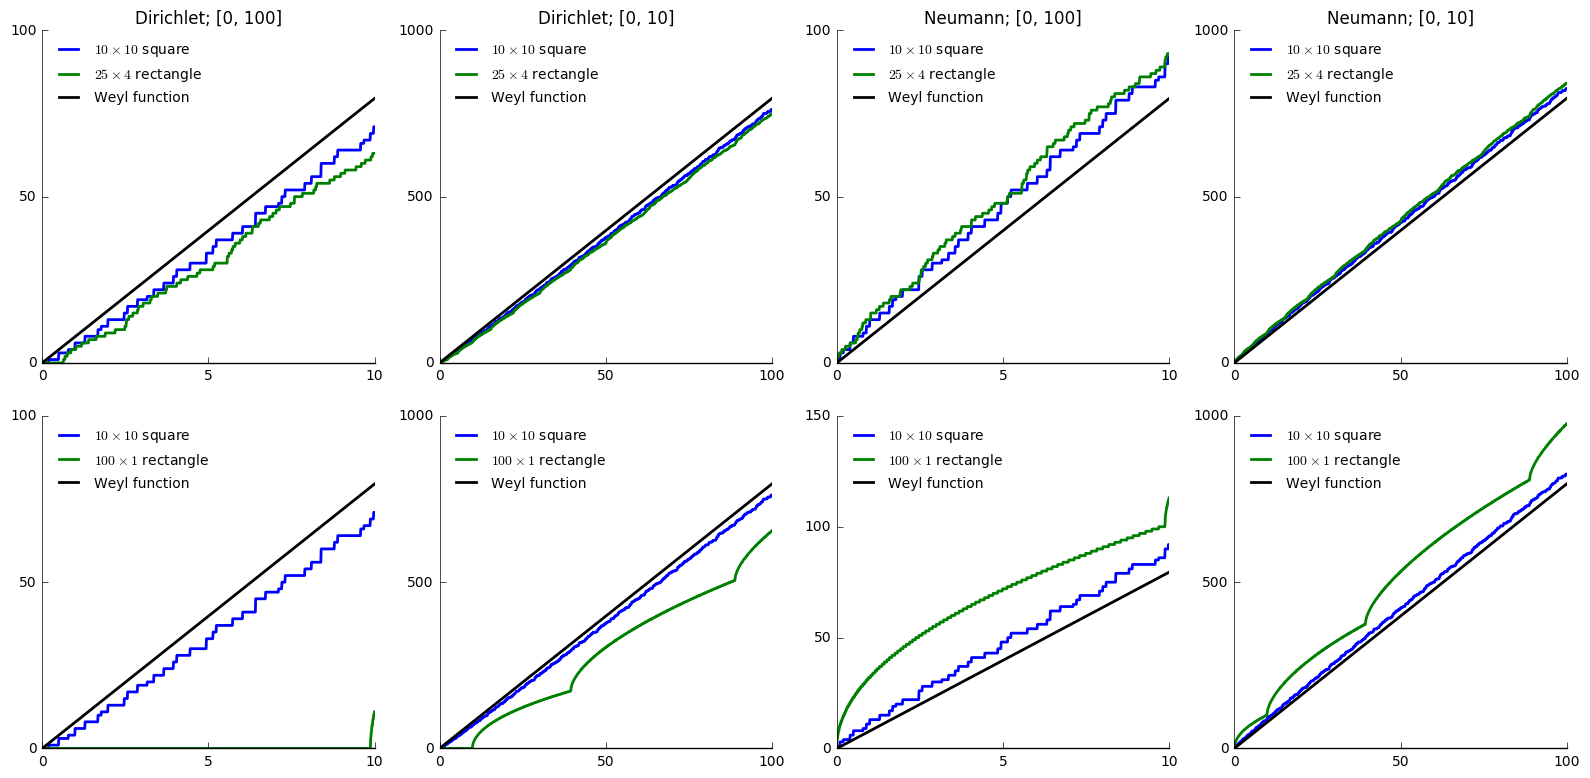

In [55]:
gs = gridspec.GridSpec(2, 4)
for row in range(2):
    for col in range(4):
        rec_name = rectangle_names[row%2]
        xvals = x_axes[col%2]
        weyl = weyl_funcs[col%2]
        curves = to_graph[row][col]
        ax = plt.subplot(gs[row, 1 - col])
        ax.plot(xvals, curves[0], label=r'$10\times 10$ square', lw=2)
        ax.plot(xvals, curves[1], label=rec_name + ' rectangle', lw=2)
        ax.plot(xvals, weyl, color='k', label='Weyl function', lw=2)
        if row == 0:
            ax.title.set_text(titles[col])
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_linewidth(0.5)
        ax.spines['right'].set_linewidth(0.5)
        ax.xaxis.tick_bottom()
        ax.yaxis.tick_left()
        ax.locator_params(axis='x', nbins='3')
        ax.locator_params(axis='y', nbins='3')
        ax.set_aspect(ax.get_xlim()[1]/ax.get_ylim()[1])
        ax.legend(frameon=False, loc='upper left', fontsize=10)
fig = plt.gcf()
fig.set_size_inches(16, 8)
fig.tight_layout()
fig.savefig("/home/neal/Dropbox/Documents/Dissertation/figures/equal_area_subsp.pdf", extension="pdf")
plt.show()

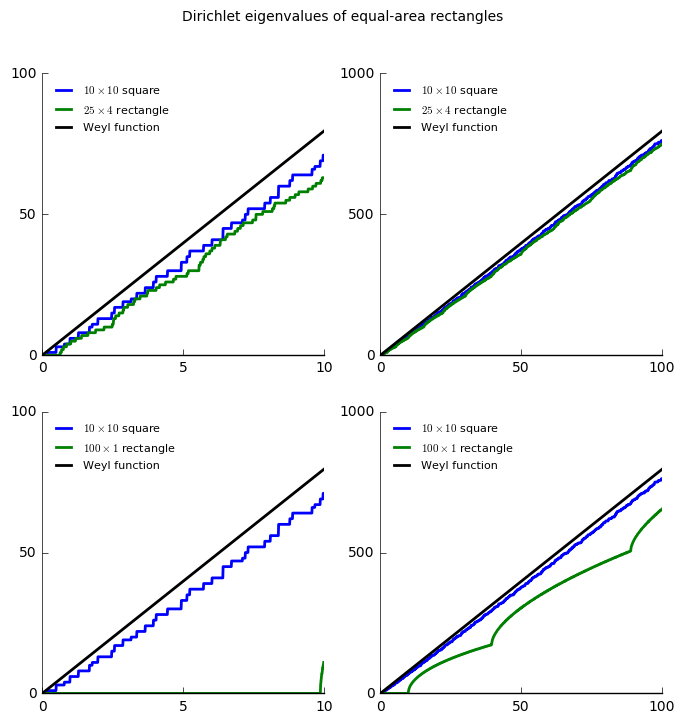

In [42]:
gs = gridspec.GridSpec(2, 2)
for row in range(2):
    for col in range(2):
        rec_name = rectangle_names[row]
        xvals = x_axes[col]
        weyl = weyl_funcs[col]
        curves = to_graph[row][col]
        ax = plt.subplot(gs[row, 1 - col])
        ax.plot(xvals, curves[0], label=r'$10\times 10$ square', lw=2)
        ax.plot(xvals, curves[1], label=rec_name + ' rectangle', lw=2)
        ax.plot(xvals, weyl, color='k', label='Weyl function', lw=2)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_linewidth(0.5)
        ax.spines['right'].set_linewidth(0.5)
        ax.xaxis.tick_bottom()
        ax.yaxis.tick_left()
        ax.locator_params(axis='x', nbins='3')
        ax.locator_params(axis='y', nbins='3')
        ax.set_aspect(ax.get_xlim()[1]/ax.get_ylim()[1])
        ax.legend(frameon=False, loc='upper left', fontsize=8)
fig = plt.gcf()
plt.suptitle('Dirichlet eigenvalues of equal-area rectangles')
fig.set_size_inches(8,8)
#fig.tight_layout()
fig.savefig("/home/neal/Dropbox/Documents/Dissertation/figures/subspectral_dirichlet.pdf", extension="pdf")
plt.show()

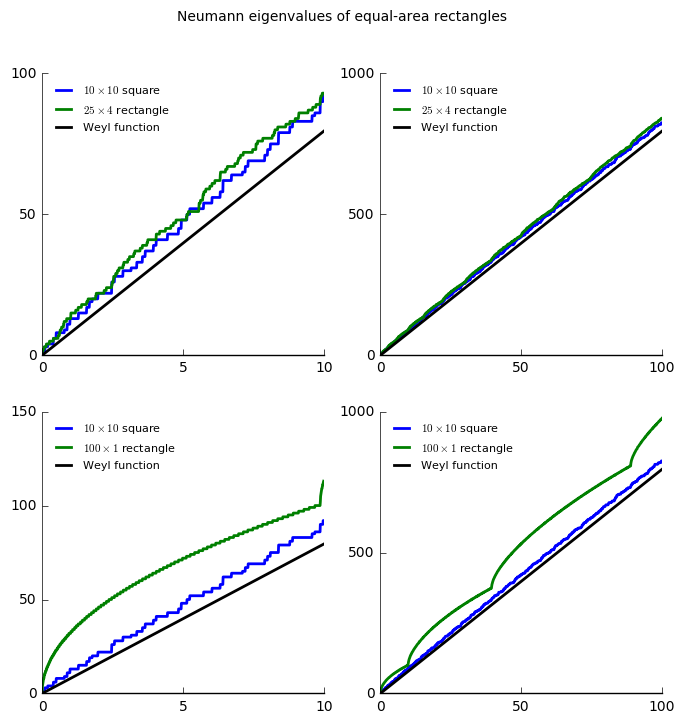

In [34]:
gs = gridspec.GridSpec(2, 2)
for row in range(2):
    for col in range(2):
        rec_name = rectangle_names[row%2]
        xvals = x_axes[col]
        weyl = weyl_funcs[col]
        curves = to_graph[row+2][col]
        ax = plt.subplot(gs[row, 1 - col])
        ax.plot(xvals, curves[0], label=r'$10\times 10$ square', lw=2)
        ax.plot(xvals, curves[1], label=rec_name + ' rectangle', lw=2)
        ax.plot(xvals, weyl, color='k', label='Weyl function', lw=2)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_linewidth(0.5)
        ax.spines['right'].set_linewidth(0.5)
        ax.xaxis.tick_bottom()
        ax.yaxis.tick_left()
        ax.locator_params(axis='x', nbins='3')
        ax.locator_params(axis='y', nbins='3')
        ax.set_aspect(ax.get_xlim()[1]/ax.get_ylim()[1])
        ax.legend(frameon=False, loc='upper left', fontsize=8)
fig = plt.gcf()
fig.set_size_inches(8,8)
plt.suptitle('Neumann eigenvalues of equal-area rectangles')
#fig.tight_layout()
fig.savefig("/home/neal/Dropbox/Documents/Dissertation/figures/subspectral_neumann.pdf", extension="pdf")
plt.show()

In [94]:
def pct_subsp(arr1, arr2):
    return float(len(arr1[arr1 == arr2]))/float(len(arr1))
pct_subsp(np.array(sq_dir_1), np.array(r1_dir_1))

0.006

In [86]:
x = np.arange(0., 100., 0.01)
square_dirichlet = np.array(sq_dir_2)
square_neumann = np.array(sq_neu_2)
recs = np.arange(50., 100., 1)
pct_dir_subsp = []
pct_neu_subsp = []
for L in recs:
    if L not in rect_dict:
        print(str(L)+' ', end='')
        dir_eigs = np.array([count(L, 100./L, lam, True) for lam in x])
        neu_eigs = np.array([count(L, 100./L, lam, False) for lam in x])
        rect_dict[L] = {'D': dir_eigs, 'N': neu_eigs}
    pct_dir_subsp.append(count_subsp(square_dirichlet, dir_eigs))
    pct_neu_subsp.append(count_subsp(neu_eigs, square_neumann))

50.0 51.0 52.0 53.0 54.0 55.0 56.0 57.0 58.0 59.0 60.0 61.0 62.0 63.0 64.0 65.0 66.0 67.0 68.0 69.0 70.0 71.0 72.0 73.0 74.0 75.0 76.0 77.0 78.0 79.0 80.0 81.0 82.0 83.0 84.0 85.0 86.0 87.0 88.0 89.0 90.0 91.0 92.0 93.0 94.0 95.0 96.0 97.0 98.0 99.0 

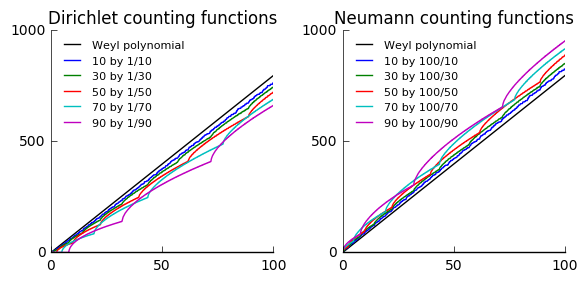

In [191]:
x_fix = np.arange(0., 100., 0.1)
fig, (ax1, ax2) = plt.subplots(1, 2)
weyl = 100*x_fix/(4*np.pi)
ax1.title.set_text('Dirichlet counting functions')
ax2.title.set_text('Neumann counting functions')
ax1.plot(x_fix, weyl, label='Weyl polynomial', color='k')
ax2.plot(x_fix, weyl, label='Weyl polynomial', color='k')
for j in range(1, 10, 2):
    ax1.plot(x_fix, rect_dict[float(10*j)]['D'], label=(str(10*j)+' by 1/' + str(10*j)))
    ax2.plot(x_fix, rect_dict[float(10*j)]['N'], label=(str(10*j)+' by 100/' + str(10*j)))
for ax in (ax1, ax2):
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_linewidth(0.5)
        ax.spines['right'].set_linewidth(0.5)
        ax.xaxis.tick_bottom()
        ax.yaxis.tick_left()
        ax.locator_params(axis='x', nbins='3')
        ax.locator_params(axis='y', nbins='3')
        ax.set_aspect(ax.get_xlim()[1]/ax.get_ylim()[1])
        ax.legend(frameon=False, loc='best', fontsize=8)
plt.tight_layout()
fig.savefig('/home/neal/Dropbox/Documents/Dissertation/figures/multiple_rects.pdf', extension='pdf')
plt.show()

In [180]:
sq_eigvals = sorted([(m*np.pi)**2 + (n*np.pi)**2 for m in range(1,1000) for n in range(1,1000)])
re_eigvals = sorted([(m*np.pi/2.)**2 + (n*np.pi/3.)**2 for m in range(1,1000) for n in range(1,1000)])

eig_dict = {}
for L in np.arange(10., 50., 0.1):
    if L not in eig_dict:
        #print(str(L), end=' ')
        eig_dict[L] = {}
        W = 100./L
        M = 30*W
        N = 30*L
        eig_dict[L]['D'] = np.array(sorted([(m*np.pi/L)**2 + (n*np.pi*L/100.)**2 
                                            for m in np.arange(1,M) for n in np.arange(1,N)])[:1000])
        eig_dict[L]['N'] = np.array(sorted([(m*np.pi/L)**2 + (n*np.pi*L/100.)**2 
                                            for m in np.arange(M) for n in np.arange(N)])[:1000])
        

In [194]:
def count_smaller(arr1, arr2):
    return len(arr1[arr1 < arr2])
def count_larger(arr1, arr2):
    return len(arr1[arr1 > arr2])

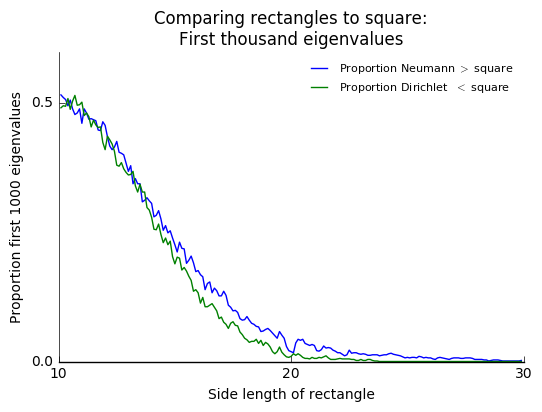

In [195]:
Ls = sorted(eig_dict.keys())[1:200]
num_dir_subsp = np.array([count_smaller(eig_dict[L]['D'], eig_dict[10.]['D']) for L in Ls])/1000.
num_neu_supsp = np.array([count_larger(eig_dict[L]['N'], eig_dict[10.]['N']) for L in Ls])/1000.
fig, ax = plt.subplots(1, 1)

ax.plot(Ls, num_neu_supsp, label='Proportion Neumann $>$ square')
ax.plot(Ls, num_dir_subsp, label='Proportion Dirichlet  $<$ square')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.5)
ax.spines['right'].set_linewidth(0.5)
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()
ax.set_xlabel('Side length of rectangle')
ax.set_ylabel('Proportion first 1000 eigenvalues')
ax.title.set_text('Comparing rectangles to square:\nFirst thousand eigenvalues')
ax.locator_params(axis='x', nbins='3')
ax.locator_params(axis='y', nbins='3')
ax.legend(frameon=False, loc='best', fontsize=8)
fig.savefig('/home/neal/Dropbox/Documents/Dissertation/figures/rectangles_first1000.pdf', extension='pdf')
plt.show()

In [250]:
#print(sorted(eig_dict.keys()))
l2 = sorted(eig_dict.keys())[50]
l3 = sorted(eig_dict.keys())[100]
l4 = sorted(eig_dict.keys())[150]
print(l2, l3, l4)
a1 = eig_dict[10.]['D']
a2 = eig_dict[l2]['D']
a3 = eig_dict[l3]['D']
a4 = eig_dict[l4]['D']
for j in range(15):
    print(a1[j], a2[j], a3[j])

15.0 20.0 25.0
0.197392088022 0.265931007474 0.419458187046
0.493480220054 0.397525732822 0.493480220054
0.493480220054 0.616850275068 0.616850275068
0.789568352087 0.923904634213 0.789568352087
0.986960440109 0.932129304547 1.01163445111
0.986960440109 1.0637240299 1.28304857214
1.28304857214 1.28304857214 1.60381071518
1.28304857214 1.31868881026 1.60381071518
1.67783274819 1.59010293129 1.67783274819
1.67783274819 1.8012028032 1.8012028032
1.7765287922 1.98488710733 1.97392088022
1.97392088022 2.04245979967 1.97392088022
1.97392088022 2.17405452502 2.19598697924
2.46740110027 2.37144661304 2.39337906726
2.46740110027 2.39337906726 2.46740110027


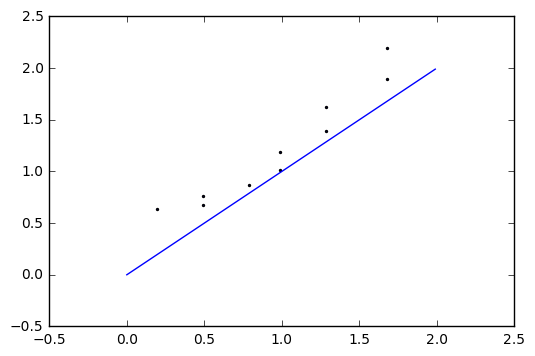

In [264]:
x = np.arange(0., 2., 0.01)
plt.plot(x, x, lw=1)
plt.scatter(a1[:10], a4[:10], s=2)
plt.show()

In [252]:
import pandas as pd

In [253]:
eigs = pd.DataFrame()
eigs["10"] = a1
eigs["15"] = a2
eigs["20"] = a3
eigs["30"] = a4

In [254]:
eigs.head()

,10,15,20,30
0,0.197392,0.265931,0.419458,0.632642
1,0.493480,0.397526,0.493480,0.680016
2,0.493480,0.616850,0.616850,0.758973
3,0.789568,0.923905,0.789568,0.869512
4,0.986960,0.932129,1.011634,1.011634


In [255]:
eigs["10>15"] = (eigs["10"] > eigs["15"]).apply(lambda x: int(x))
eigs["10>20"] = (eigs["10"] > eigs["20"]).apply(lambda x: int(x))
eigs["10>30"] = (eigs["10"] > eigs["30"]).apply(lambda x: int(x))

In [256]:
eigs["10>15 cum prob"] = eigs["10>15"].cumsum()/(eigs.index+1)
eigs["10>20 cum prob"] = eigs["10>20"].cumsum()/(eigs.index+1)
eigs["10>30 cum prob"] = eigs["10>30"].cumsum()/(eigs.index+1)

In [261]:
eigs.head()

,10,15,20,30,10>15,10>20,10>30,10>15 cum prob,10>20 cum prob,10>30 cum prob
0,0.197392,0.265931,0.419458,0.632642,0,0,0,0.000000,0.000000,0.0
1,0.493480,0.397526,0.493480,0.680016,1,1,0,0.500000,0.500000,0.0
2,0.493480,0.616850,0.616850,0.758973,0,0,0,0.333333,0.333333,0.0
3,0.789568,0.923905,0.789568,0.869512,0,0,0,0.250000,0.250000,0.0
4,0.986960,0.932129,1.011634,1.011634,1,0,0,0.400000,0.200000,0.0


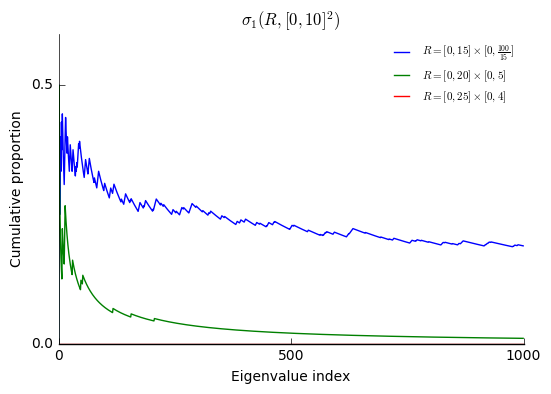

In [274]:
fig, ax = plt.subplots()

ax.plot(eigs.index, eigs["10>15 cum prob"], label=r'$R = [0,15]\times [0,\frac{100}{15}]$', lw=1)
ax.plot(eigs.index, eigs["10>20 cum prob"], label=r'$R = [0,20]\times [0,5]$', lw=1)
ax.plot(eigs.index, eigs["10>30 cum prob"], label=r'$R = [0,25]\times [0,4]$', lw=1)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.5)
ax.spines['right'].set_linewidth(0.5)
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()
ax.set_xlabel('Eigenvalue index')
ax.set_ylabel('Cumulative proportion')
ax.title.set_text(r'$\sigma_1(R, [0,10]^2)$')
ax.locator_params(axis='x', nbins='3')
ax.locator_params(axis='y', nbins='3')
ax.legend(frameon=False, loc='best', fontsize=8)
fig.savefig('/home/neal/Dropbox/Documents/Dissertation/figures/subspec_decay1000.pdf', extension='pdf')

plt.show()